# Gender Analysis
Include information and graphs that help answering the following questions
* Do men or women dominate speaking roles in Hollywood movies?
* Has gender balance in speaking roles changed over time?
* Do films in which men do more speaking make a lot more money than films in which women speak more?

## Some graphs to include
Plot the following by year
* General proportion of male lead.
* Proportion of words spoken.
* Lead age average by gender
* Words per non-lead person on average depending on gender (the same proportion stands as with the lead?)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
sns.set_theme(style="darkgrid")

In [2]:
# Load the dataset
url = 'data/train.csv'
data = pd.read_csv(url)

In [3]:
# Dropping 0-word entries

# Get indexes for which the number of words of female or male is 0
dropIndex = data[ (data['Number words female'] == 0) | (data['Number words male'] == 0) ].index

# Delete the rows from the dataset
data.drop(dropIndex , inplace=True)
data['Number words co-lead'] = data['Number of words lead'] - data['Difference in words lead and co-lead']

In [4]:
# Index by year for easier management of data
data.reset_index(inplace=True)
data.set_index('Year', inplace=True) 
data.sort_index(ascending=True, inplace=True);

# Select years to focus on (start in 1981, before there is little data)
years = np.array(data.index.unique())
years = years[years > 1980]

years_dict = {'Year': years} # create dict of years for feeding a pandas dataframe
analysis_df = pd.DataFrame(data=years_dict) # create a dataframe with a first column 'Year'
analysis_df.set_index('Year');

In [5]:
# Populate analysis_df with relevant stats, consolidated by year

male_lead_p_year = []
male_words_p_year = []

for year in years:
    
    year_df = data.loc[[year]] # Create a DF with the year (making sure it comes as a matrix)
    
    # % of male lead actors
    num_movies = len(year_df)
    male_lead_p_year.append((year_df['Lead'] == 'Male').sum() / num_movies)
    
    # % of words spoken by male
    num_words_male = year_df['Number words male'].sum()
    num_words_male += year_df[(year_df['Lead'] == 'Male')]['Number of words lead'].sum()
    num_words_male += year_df[(year_df['Lead'] == 'Female')]['Number words co-lead'].sum()
    male_words_p_year.append(num_words_male / year_df['Total words'].sum())
    
analysis_df['Male lead %'] = male_lead_p_year
analysis_df['Male words %'] = male_words_p_year

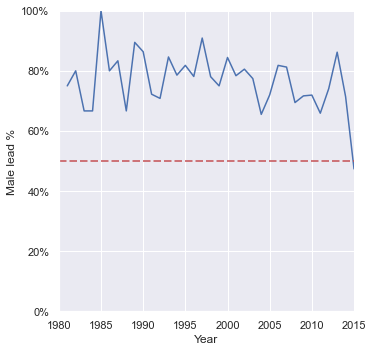

In [6]:
male_lead_plot = sns.relplot(data=analysis_df, x=analysis_df['Year'], y='Male lead %', kind='line');
male_lead_plot.set(xlim=(1980,2015), ylim=(0,1))
male_lead_plot.ax.axline(xy1=(1980, 0.5), slope=0, color="r", dashes=(5, 2))
male_lead_plot.ax.yaxis.set_major_formatter(PercentFormatter(1))

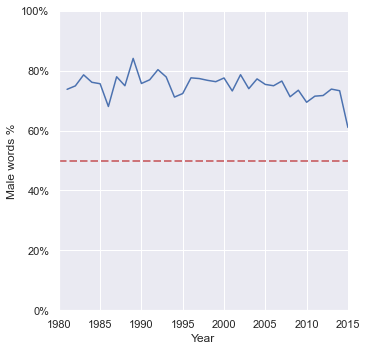

In [7]:
male_lead_plot = sns.relplot(data=analysis_df, x=analysis_df['Year'], y='Male words %', kind='line');
male_lead_plot.set(xlim=(1980,2015), ylim=(0,1))
male_lead_plot.ax.axline(xy1=(1980, 0.5), slope=0, color="r", dashes=(5, 2))
male_lead_plot.ax.yaxis.set_major_formatter(PercentFormatter(1))